<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PB/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
df = pd.read_csv("sample_data/dataset1_combined.csv", encoding = 'utf-8')

In [5]:
df.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx


In [4]:
df.shape

(8417, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8417 non-null   int64 
 1   Short description            8409 non-null   object
 2   Description                  8416 non-null   object
 3   Caller                       8417 non-null   object
 4   Assignment group             8417 non-null   object
 5   combined_description         8417 non-null   object
 6   combined_description_caller  8417 non-null   object
dtypes: int64(1), object(6)
memory usage: 460.4+ KB


In [6]:
df.columns

Index(['Unnamed: 0', 'Short description', 'Description', 'Caller',
       'Assignment group', 'combined_description',
       'combined_description_caller'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0','Short description','Description','Caller','combined_description_caller','Assignment group'],axis='columns', inplace=True)

In [7]:
df.head()

,combined_description
0,login issue -verified user details.(employee# ...
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page unable to access...
4,skype error skype error


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   combined_description  8417 non-null   object
dtypes: object(1)
memory usage: 65.9+ KB


In [9]:
df.isnull().sum()

combined_description    0
dtype: int64

In [10]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df['combined_description'] = df['combined_description'].apply(fn_decode_to_ascii)

In [12]:
pip install langdetect

     |████████████████████████████████| 981 kB 4.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=54a182c80daf2b12fef45b47844a18cddce94ec91c825d654eb5d0ca5b750280
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [13]:
from langdetect import detect

In [14]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['Language'] = df['combined_description'].apply(fn_lan_detect)

In [17]:
df['Language'].value_counts()

en    7050
de     384
af     265
it     128
fr     105
no      96
nl      69
sv      59
es      51
ca      40
pl      31
da      30
pt      18
ro      13
tl      12
sl      10
cy       9
sq       9
hr       8
so       5
fi       5
et       4
id       4
cs       3
sk       2
lv       2
lt       2
hu       1
sw       1
vi       1
Name: Language, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


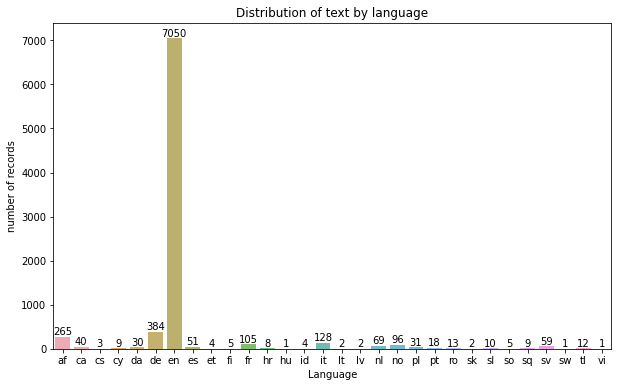

In [19]:
x = df["Language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();